#Working on Image Classification Model

Outline:
1. Using ImageDataGenerator with a Validation set
    for classifying Horses vs Human dataset
2. Effect of Compacted Images in Training
3. Handling Complex Images - Happy and Sad Dataset

##ImageDataGenerator with a Validation Set

We will continue with the ImageDataGenerator class to prepare the Horses or Humans dataset. Here, we will add a validation set so we can also measure how well the model performs on data it hasn't seen.

In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-01-26 15:20:24--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   117MB/s    in 1.2s    

2023-01-26 15:20:25 (117 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-01-26 15:20:32--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2023-01-26 15:20:32 (104 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
#Unzipping both the archives
import zipfile

# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [ ]:
#Directories containing the images
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [ ]:
train_horse_dir

'./horse-or-human/horses'

In [ ]:
#filenames look like in these directories:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse28-9.png', 'horse40-1.png', 'horse39-7.png', 'horse02-5.png', 'horse48-6.png', 'horse01-3.png', 'horse01-0.png', 'horse17-9.png', 'horse49-0.png', 'horse26-8.png']
TRAIN SET HUMANS: ['human05-29.png', 'human16-30.png', 'human16-10.png', 'human13-25.png', 'human13-15.png', 'human12-25.png', 'human04-30.png', 'human08-27.png', 'human10-15.png', 'human09-29.png']
VAL SET HORSES: ['horse5-519.png', 'horse4-439.png', 'horse1-554.png', 'horse2-441.png', 'horse4-530.png', 'horse6-345.png', 'horse3-469.png', 'horse3-498.png', 'horse4-403.png', 'horse3-326.png']
VAL SET HUMANS: ['valhuman03-22.png', 'valhuman01-24.png', 'valhuman05-12.png', 'valhuman05-14.png', 'valhuman05-03.png', 'valhuman02-13.png', 'valhuman01-05.png', 'valhuman04-23.png', 'valhuman01-23.png', 'valhuman01-13.png']


In [ ]:
#Total images
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

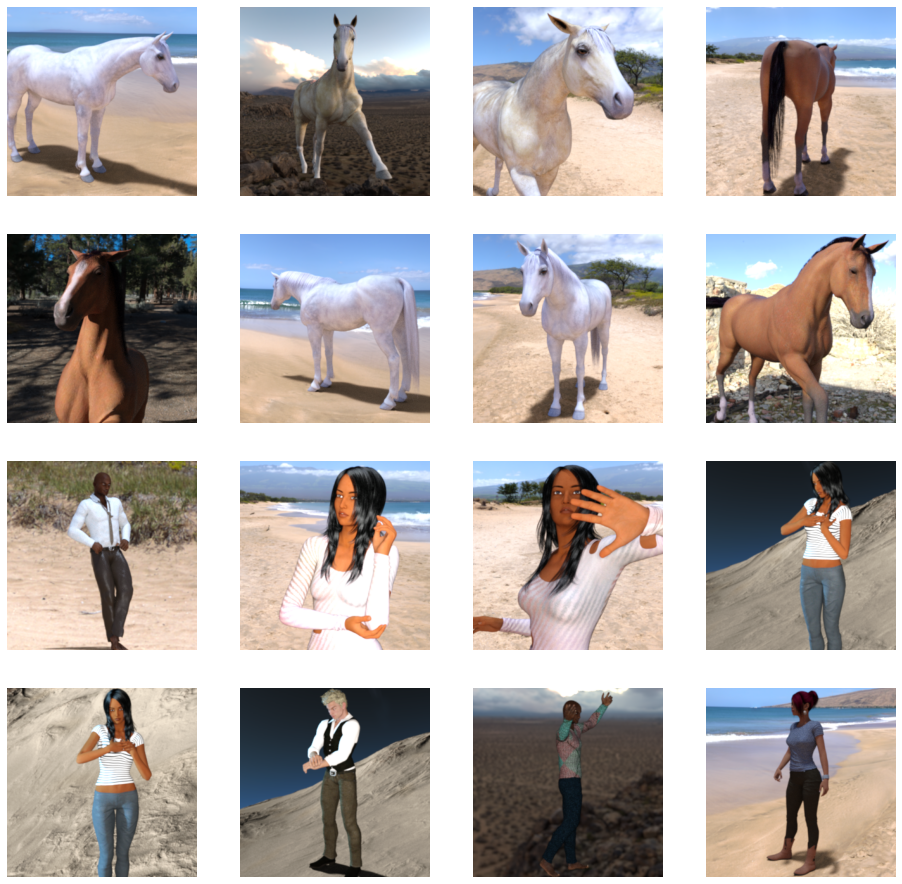

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

###Building a Small Model from Scratch

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

###Data Preprocessing

Now we will setup the data generators. 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


###Training

Now training the model for 15 epochs. Here, we will pass parameters for validation_data and validation_steps. With these, we will notice additional outputs in the print statements: val_loss and val_accuracy. 

Notice that as we train with more epochs, our training accuracy might go up but our validation accuracy goes down. This can be a sign of overfitting and we need to prevent our model from reaching this point.

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 102s 12s/step - loss: 0.6937 - accuracy: 0.5239 - val_loss: 0.6198 - val_accuracy: 0.8555
Epoch 2/15
8/8 [==============================] - 85s 10s/step - loss: 1.0483 - accuracy: 0.6763 - val_loss: 0.6166 - val_accuracy: 0.5234
Epoch 3/15
8/8 [==============================] - 82s 10s/step - loss: 0.5674 - accuracy: 0.7286 - val_loss: 0.4562 - val_accuracy: 0.7812
Epoch 4/15
8/8 [==============================] - 82s 10s/step - loss: 0.7120 - accuracy: 0.7442 - val_loss: 0.4876 - val_accuracy: 0.7656
Epoch 5/15
8/8 [==============================] - 82s 10s/step - loss: 0.2964 - accuracy: 0.9143 - val_loss: 1.3147 - val_accuracy: 0.7852
Epoch 6/15
8/8 [==============================] - 83s 10s/step - loss: 0.5616 - accuracy: 0.8643 - val_loss: 0.4406 - val_accuracy: 0.8164
Epoch 7/15
8/8 [==============================] - 84s 10s/step - loss: 0.2262 - accuracy: 0.9355 - val_loss: 2.0041 - val_accuracy: 0.7578
Epoch 8/15
8/8 [==========

###Model Prediction

Running a prediction using the model. This code will allow us to choose 1 or more files from our file system, upload them, and run them through the model, giving an indication of whether the object is a horse or a human.




Saving humanfaceonly.webp to humanfaceonly (2).webp
Saving donkey.jpg to donkey (2).jpg
Saving human1.webp to human1 (2).webp
Saving horse2.jpeg to horse2 (3).jpeg
Saving horse1.webp to horse1 (3).webp
1/1 [==============================] - 0s 50ms/step
[0.8636742]
humanfaceonly.webp is a human
1/1 [==============================] - 0s 41ms/step
[2.088628e-07]
donkey.jpg is a horse
1/1 [==============================] - 0s 39ms/step
[0.999998]
human1.webp is a human
1/1 [==============================] - 0s 39ms/step
[0.4989318]
horse2.jpeg is a horse
1/1 [==============================] - 0s 42ms/step
[1.4823852e-14]
horse1.webp is a horse


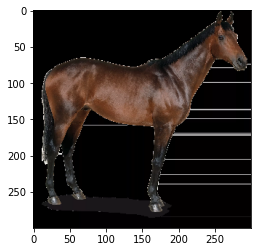

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()


for i, fn in enumerate(uploaded.keys()):

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

###Visualizing Intermediate Representations



1/1 [==============================] - 0s 136ms/step


<ipython-input-22-3501e75cf878>:45: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


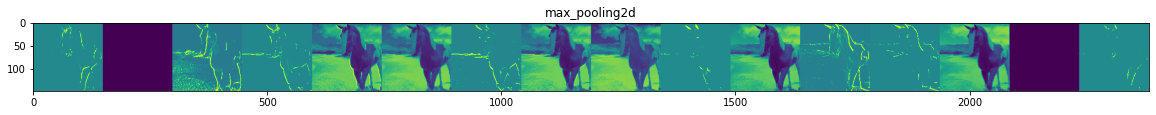

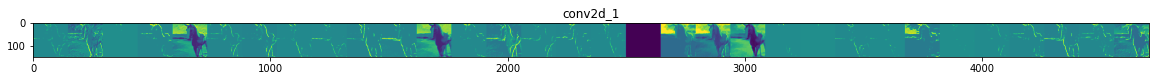

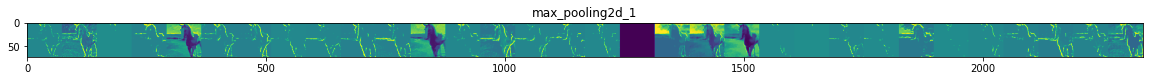

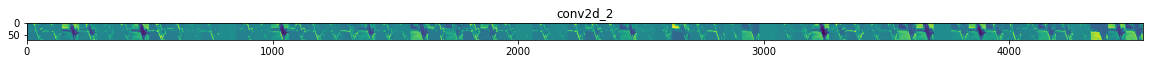

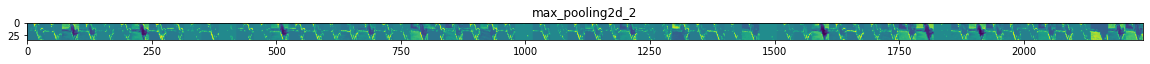

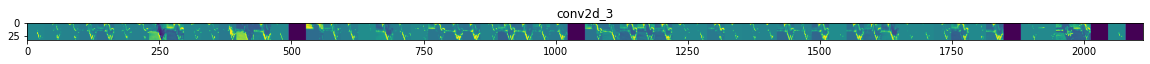

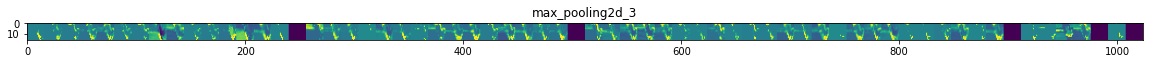

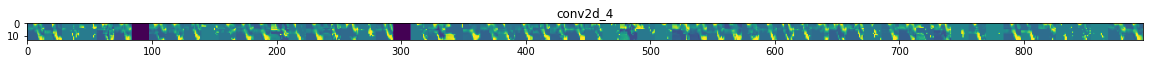

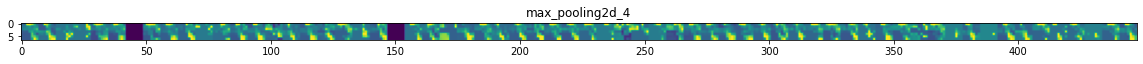

In [ ]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

###Clean up

Terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

##Effect of Compacted Images in Training

we will see how reducing the target size of the generator images will affect the architecture and performance of our model. This is a useful technique in case we need to speed up our training or save compute resources. Let's begin!

In [ ]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [ ]:

train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_hames = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_hames[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse28-9.png', 'horse40-1.png', 'horse39-7.png', 'horse02-5.png', 'horse48-6.png', 'horse01-3.png', 'horse01-0.png', 'horse17-9.png', 'horse49-0.png', 'horse26-8.png']
TRAIN SET HUMANS: ['human05-29.png', 'human16-30.png', 'human16-10.png', 'human13-25.png', 'human13-15.png', 'human12-25.png', 'human04-30.png', 'human08-27.png', 'human10-15.png', 'human09-29.png']
VAL SET HORSES: ['horse5-519.png', 'horse4-439.png', 'horse1-554.png', 'horse2-441.png', 'horse4-530.png', 'horse6-345.png', 'horse3-469.png', 'horse3-498.png', 'horse4-403.png', 'horse3-326.png']
VAL SET HUMANS: ['valhuman03-22.png', 'valhuman01-24.png', 'valhuman05-12.png', 'valhuman05-14.png', 'valhuman05-03.png', 'valhuman02-13.png', 'valhuman01-05.png', 'valhuman04-23.png', 'valhuman01-23.png', 'valhuman01-13.png']


###Build the Model

The model will follow the same architecture as before but the key difference is in the input_shape parameter of the first Conv2D layer. Since we will be compacting the images later in the generator, we need to specify the expected image size here. So instead of 300x300 as in the previous models, here we will specify a smaller 150x150 array.

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution (using one less conv layer)
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 64)      

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

###Data processing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we used binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we used binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


###Training

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 28s 3s/step - loss: 0.9487 - accuracy: 0.5384 - val_loss: 0.8035 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 25s 3s/step - loss: 0.6134 - accuracy: 0.6919 - val_loss: 2.2115 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 24s 3s/step - loss: 0.6488 - accuracy: 0.7686 - val_loss: 0.3717 - val_accuracy: 0.8633
Epoch 4/15
8/8 [==============================] - 25s 3s/step - loss: 0.3595 - accuracy: 0.8643 - val_loss: 1.1414 - val_accuracy: 0.7930
Epoch 5/15
8/8 [==============================] - 24s 3s/step - loss: 0.2308 - accuracy: 0.8999 - val_loss: 1.2356 - val_accuracy: 0.8320
Epoch 6/15
8/8 [==============================] - 26s 3s/step - loss: 0.2668 - accuracy: 0.8910 - val_loss: 0.6900 - val_accuracy: 0.8594
Epoch 7/15
8/8 [==============================] - 25s 3s/step - loss: 0.1731 - accuracy: 0.9310 - val_loss: 1.0564 - val_accuracy: 0.8438
Epoch 8/15
8/8 [==================

## Handling Complex Images - Happy or Sad Dataset

Here we will be using the happy or sad dataset, which contains 80 images of emoji-like faces, 40 happy and 40 sad.

Create a convolutional neural network that trains to 99.9% accuracy on these images, which cancels training upon hitting this training accuracy threshold.

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import opendatasets as od

###Load and explore the data
Begin by looking at some images of the dataset.

All the images are contained within the ./data/ directory.

This directory contains two subdirectories happy/ and sad/ and each image is saved under the subdirectory related to the class it belongs to.


In [ ]:
od.download('https://www.kaggle.com/datasets/aravindanr22052001/emotiondetection-happy-or-sad')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rohitpaul23
Your Kaggle Key: ··········


100%|██████████| 64.8M/64.8M [00:02<00:00, 28.9MB/s]


Sample happy image:


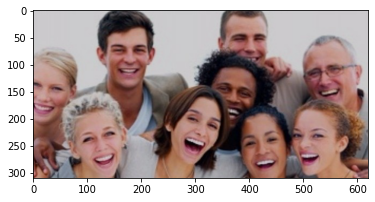


Sample sad image:


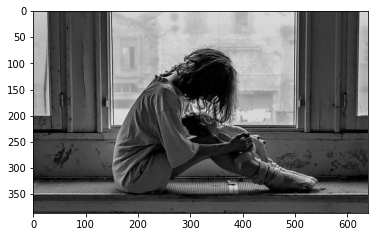

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

base_dir = "./emotiondetection-happy-or-sad/data/"
happy_dir = os.path.join(base_dir, "happy/")
sad_dir = os.path.join(base_dir, "sad/")

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (310, 620, 3)
The maximum pixel value used is: 223.0


###Defining the callback

Coding the callback responsible for stopping training (once a desired level of accuracy is reached)



In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

###Pre-processing the data


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# GRADED FUNCTION: image_generator
def image_generator():

    # Instantiate the ImageDataGenerator class
    train_datagen = ImageDataGenerator(rescale=1/255)

    # Specify the method to load images from a directory and pass in the appropriate arguments:
    # - directory: should be a relative path to the directory containing the data
    # - targe_size: set this equal to the resolution of each image (excluding the color dimension)
    # - batch_size: number of images the generator yields when asked for a next batch. Set this to 10.
    # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "sparse".
    #               Pick the one that better suits here given that the labels are going to be 1D binary labels.
    train_generator = train_datagen.flow_from_directory(directory=base_dir,
                                                        target_size=(300, 300),
                                                        batch_size=16,
                                                        class_mode='binary')

    return train_generator

In [ ]:
gen = image_generator()

Found 167 images belonging to 2 classes.


###Creating and training your model

This function below return our neural network.


In [ ]:
from tensorflow.keras import optimizers, losses

def train_happy_sad_model():

    # Define the model
    model = tf.keras.models.Sequential([
        #Add convolutional and max pooling
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),

        #Add convolutional and max pooling
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        #Add convolutional and max pooling
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        #Add the dense layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy']) 
    

    return model 


In [ ]:
model = train_happy_sad_model()

# Instantiate the callback
callbacks = myCallback()

# Train the model
history = model.fit(x=gen,
                    epochs=15,
                    callbacks=[callbacks]
                    ) 
    




Epoch 1/15
11/11 [==============================] - 20s 2s/step - loss: 7.3787 - accuracy: 0.5030
Epoch 2/15
11/11 [==============================] - 19s 2s/step - loss: 0.9561 - accuracy: 0.6108
Epoch 3/15
11/11 [==============================] - 19s 2s/step - loss: 0.6586 - accuracy: 0.6347
Epoch 4/15
11/11 [==============================] - 20s 2s/step - loss: 0.9991 - accuracy: 0.7006
Epoch 5/15
11/11 [==============================] - 20s 2s/step - loss: 0.6305 - accuracy: 0.7126
Epoch 6/15
11/11 [==============================] - 20s 2s/step - loss: 1.0412 - accuracy: 0.7725
Epoch 7/15
11/11 [==============================] - 19s 2s/step - loss: 0.4287 - accuracy: 0.8743
Epoch 8/15
11/11 [==============================] - 19s 2s/step - loss: 1.0892 - accuracy: 0.8084
Epoch 9/15
11/11 [==============================] - 19s 2s/step - loss: 0.2589 - accuracy: 0.9281
Epoch 10/15
11/11 [==============================] - 19s 2s/step - loss: 0.2029 - accuracy: 0.9162
Epoch 11/15
11/11 [

In [ ]:
print(f"Our model reached the desired accuracy after {len(hist.epoch)} epochs")

Our model reached the desired accuracy after 11 epochs


In [ ]:
od.download('https://www.kaggle.com/datasets/duaazehraalvi/lab-mid-2')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rohitpaul23
Your Kaggle Key: ··········


100%|██████████| 305k/305k [00:00<00:00, 43.7MB/s]

In [ ]:
dir = './lab-mid-2/TEST/'

testFile = os.listdir(dir)

len_ = len(testFile)

testFile, len_

(['images (1).jpg',
  'boy-6139367_1280.jpg',
  'images.jpg',
  'test 2.png',
  '11-smile.jpg',
  'test 3.jpg'],
 6)

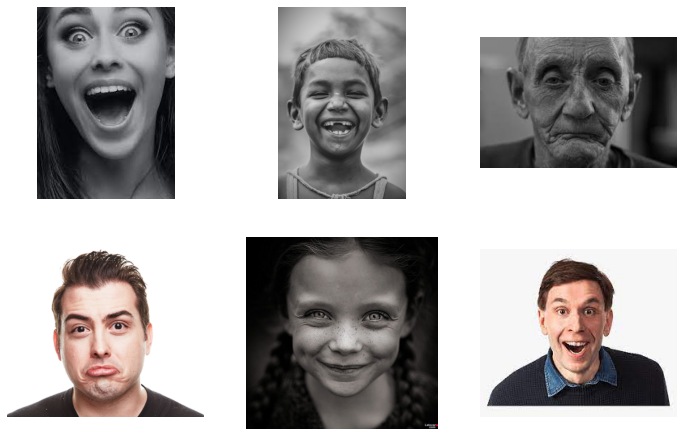

In [ ]:
import matplotlib.image as mpimg

fig = plt.gcf()
fig.set_size_inches(3 * 4, 3 * 4)

next_pix = [os.path.join(dir, fname) for fname in testFile]

for i, img_path in enumerate(next_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(3, 3, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:


for i, fn in enumerate(testFile):

  path = dir + fn
  img = load_img(path, target_size=(300, 300, 3))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a happy")
  else:
    print(fn + " is a sad")

1/1 [==============================] - 0s 57ms/step
[0.9992614]
images (1).jpg is a happy
1/1 [==============================] - 0s 49ms/step
[0.506094]
boy-6139367_1280.jpg is a happy
1/1 [==============================] - 0s 49ms/step
[0.851955]
images.jpg is a happy
1/1 [==============================] - 0s 51ms/step
[0.9286567]
test 2.png is a happy
1/1 [==============================] - 0s 54ms/step
[0.999993]
11-smile.jpg is a happy
1/1 [==============================] - 0s 57ms/step
[0.99946713]
test 3.jpg is a happy


**Requires further analysis